In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv(".\CareerMapping.csv")

In [3]:
y = data.pop("Role")

In [4]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

In [5]:
original_labels = label_encoder.classes_
label_mapping = {i: label for i, label in enumerate(original_labels)}
print(label_mapping)

{0: 'AI ML Specialist', 1: 'API Specialist', 2: 'Application Support Engineer', 3: 'Business Analyst', 4: 'Customer Service Executive', 5: 'Cyber Security Specialist', 6: 'Database Administrator', 7: 'Graphics Designer', 8: 'Hardware Engineer', 9: 'Helpdesk Engineer', 10: 'Information Security Specialist', 11: 'Networking Engineer', 12: 'Project Manager', 13: 'Software Developer', 14: 'Software tester', 15: 'Technical Writer'}


In [6]:
y_train_encoded

array([6, 6, 6, ..., 7, 7, 7])

In [7]:
x_train,x_temp,y_train,y_temp=train_test_split(data,y_train_encoded,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [22]:
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(x_train, y_train)
y_train_pred = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = svm.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.9958596644149053
0.9883805374001452


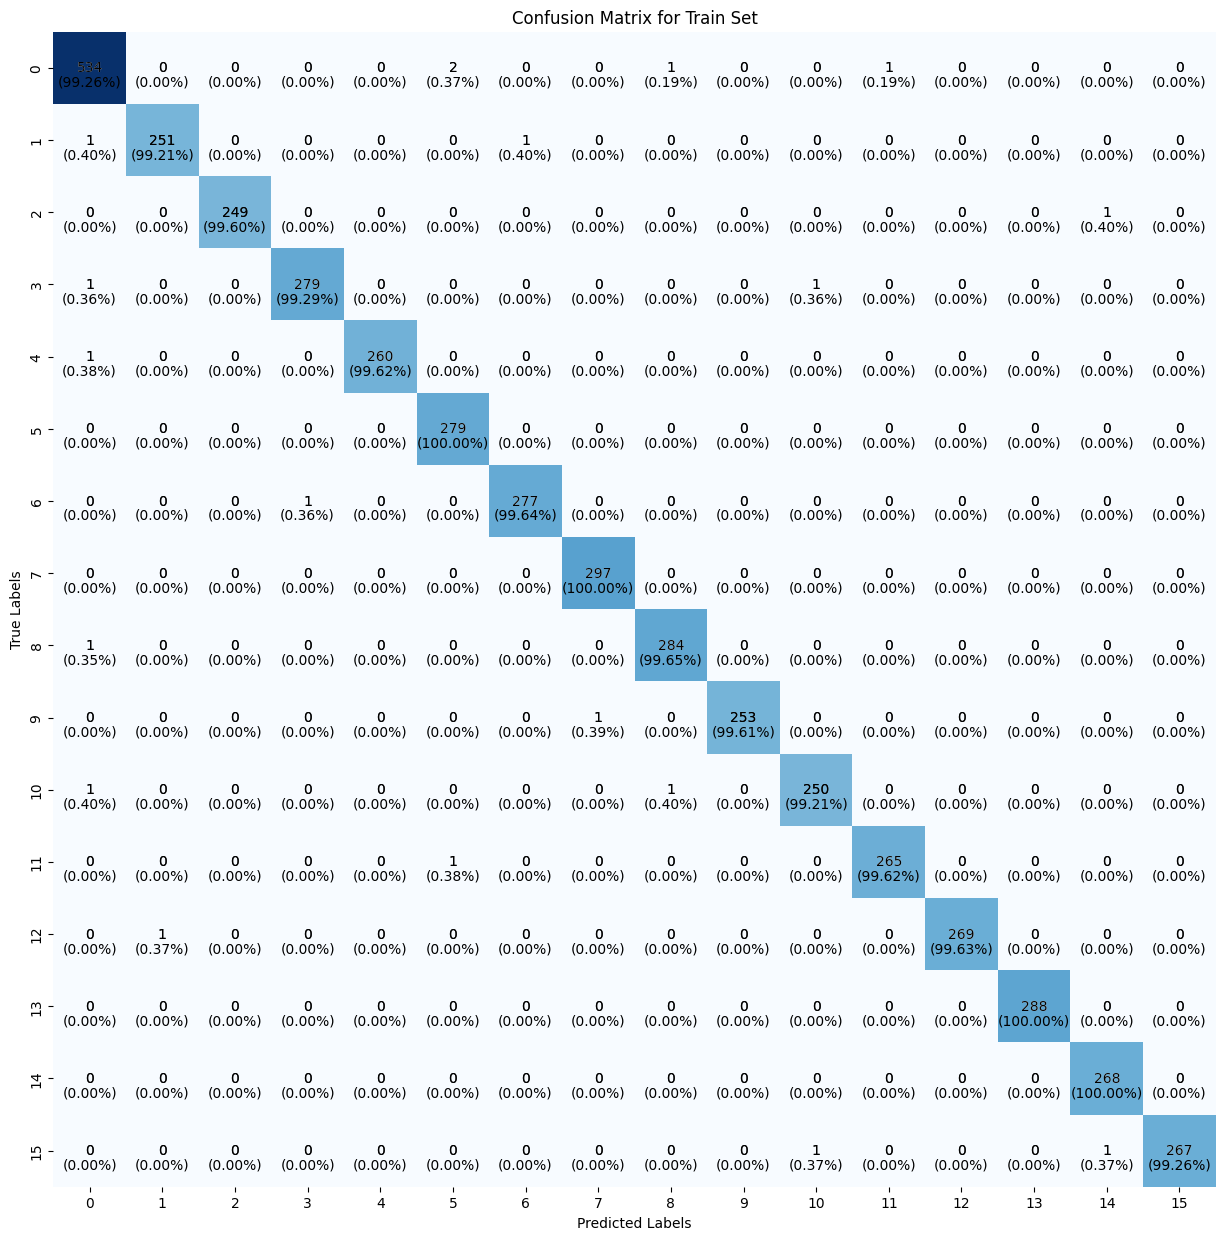

In [17]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

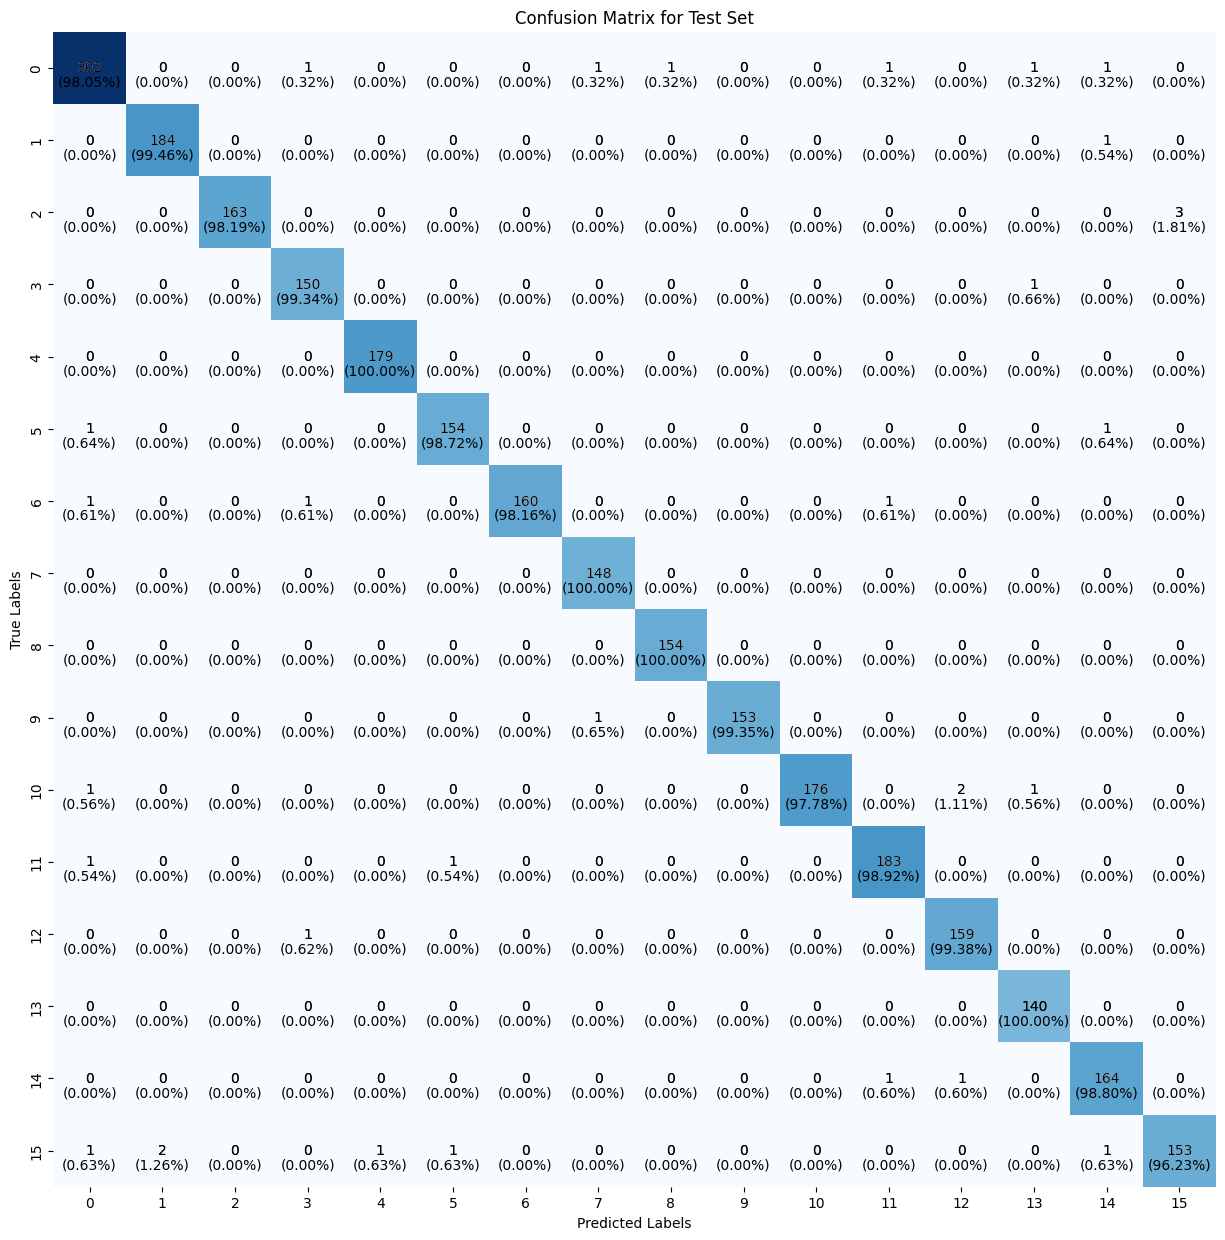

In [16]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [26]:
c = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
for i in c:
    svm = SVC(kernel='rbf', C=i, random_state=42)
    svm.fit(x_train, y_train)
    y_train_pred = svm.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_val_pred = svm.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f" Train accuracy and Val accuracy for C {i} is {train_accuracy} and {val_accuracy}")

 Train accuracy and Val accuracy for C 1.0 is 0.9958596644149053 and 0.9907407407407407
 Train accuracy and Val accuracy for C 2.0 is 0.9967313140117673 and 0.988562091503268
 Train accuracy and Val accuracy for C 3.0 is 0.9973850512094138 and 0.9901960784313726
 Train accuracy and Val accuracy for C 4.0 is 0.9984746132054914 and 0.9907407407407407
 Train accuracy and Val accuracy for C 5.0 is 0.9986925256047069 and 0.9901960784313726
 Train accuracy and Val accuracy for C 6.0 is 0.9995641752015689 and 0.9901960784313726
 Train accuracy and Val accuracy for C 7.0 is 0.9993462628023535 and 0.9918300653594772
